In [8]:
#필요 라이브러리
import pandas as pd
import numpy as np

#################### Train_Test Split ######################
from sklearn.model_selection import train_test_split


#################### 성능평가 ############################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import sklearn
#################### XGBoost ###########################
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV


################## lgbm ###########################
from lightgbm import LGBMClassifier

##################### Decision Tree #######################
from sklearn.tree import DecisionTreeClassifier

################## RandomForest ##########################
from sklearn.ensemble import RandomForestClassifier

###################### Logistic Rregression ###############
from sklearn.linear_model import LogisticRegression

##################### Gradient Boosting ###############
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [9]:
#모델 성능 평가 함수화
def model_assessment(test,pred):
    confusion = confusion_matrix(test, pred)
    accuracy = accuracy_score(test,pred)
    report = metrics.classification_report(test, pred, digits=2)
    
    print('accuracy', accuracy, '\n')
    print('confusion_matrix',confusion, '\n')
    print(report)

In [10]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [11]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [12]:
df_m = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/PCA30.csv')

In [13]:
df_m.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,연체여부
0,0,-204850.823301,52770.958514,-51743.899640,-74094.165915,21946.601873,-23300.910750,23727.231647,-30247.424622,-23103.043492,7408.619201,-11950.475089,-3.860570e+02,6550.545997,-1809.734301,12354.731227,-1765.532661,-913.911872,-4753.597451,-311.099729,158.886472,-252.534625,-33.835924,112.532205,-8.806348,-0.329644,-33.055148,11.179222,-3.672021,14.883649,-9.091747,0
1,1,405653.596448,-815190.314784,-72709.247509,-90350.879491,-9774.509604,-26803.618517,-97785.375494,9020.940422,29321.471578,-28361.755173,108151.816637,1.020552e+06,-27163.089763,-6517.407193,-15006.637588,-4371.368554,6926.029619,-4166.695116,2801.330245,-423.510043,-880.516795,-72.552842,23.117528,-14.270063,5.922864,7.501598,-12.392604,1.676508,2.323156,2.320190,0
2,2,-206097.271257,56087.951338,-46743.977165,-74829.805830,22286.637358,-25915.054517,-15540.751364,-25132.762481,-20575.290977,2169.965625,-9793.306133,-7.871127e+02,6383.290913,-2101.591123,-3581.171104,-1762.940467,-798.431139,2178.362419,-123.843038,194.559392,-210.008613,-90.218719,-14.905291,15.638953,-10.855479,-2.041852,0.430097,1.146049,0.480500,0.148661,0
3,3,-206110.538095,56100.026729,-52058.258259,-75115.582631,22935.645054,-25833.536899,-15445.108749,-24569.240636,-20111.362045,6878.747390,-10112.348763,-6.988443e+02,6155.257522,-2069.970026,-3615.590459,-1741.241630,-705.335974,-4630.200105,-115.199222,166.597363,-211.383874,-29.039764,-12.282440,-3.675728,10.275420,0.566608,0.399041,-2.340568,3.386706,1.090823,0
4,4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688069,-42251.653571,-20923.867196,-77387.953171,-45056.071869,-90459.010641,-11004.365083,4.307013e+02,4776.089862,-2402.400472,-6734.460541,-483.816583,636.169400,-10300.849642,-744.715971,-356.222427,-1024.813823,-14.739048,-11.505845,-11.296433,8.830334,-0.072237,0.896735,-3.269015,4.676838,2.052040,0


In [14]:
df_m.drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
len(df_m.columns)

31

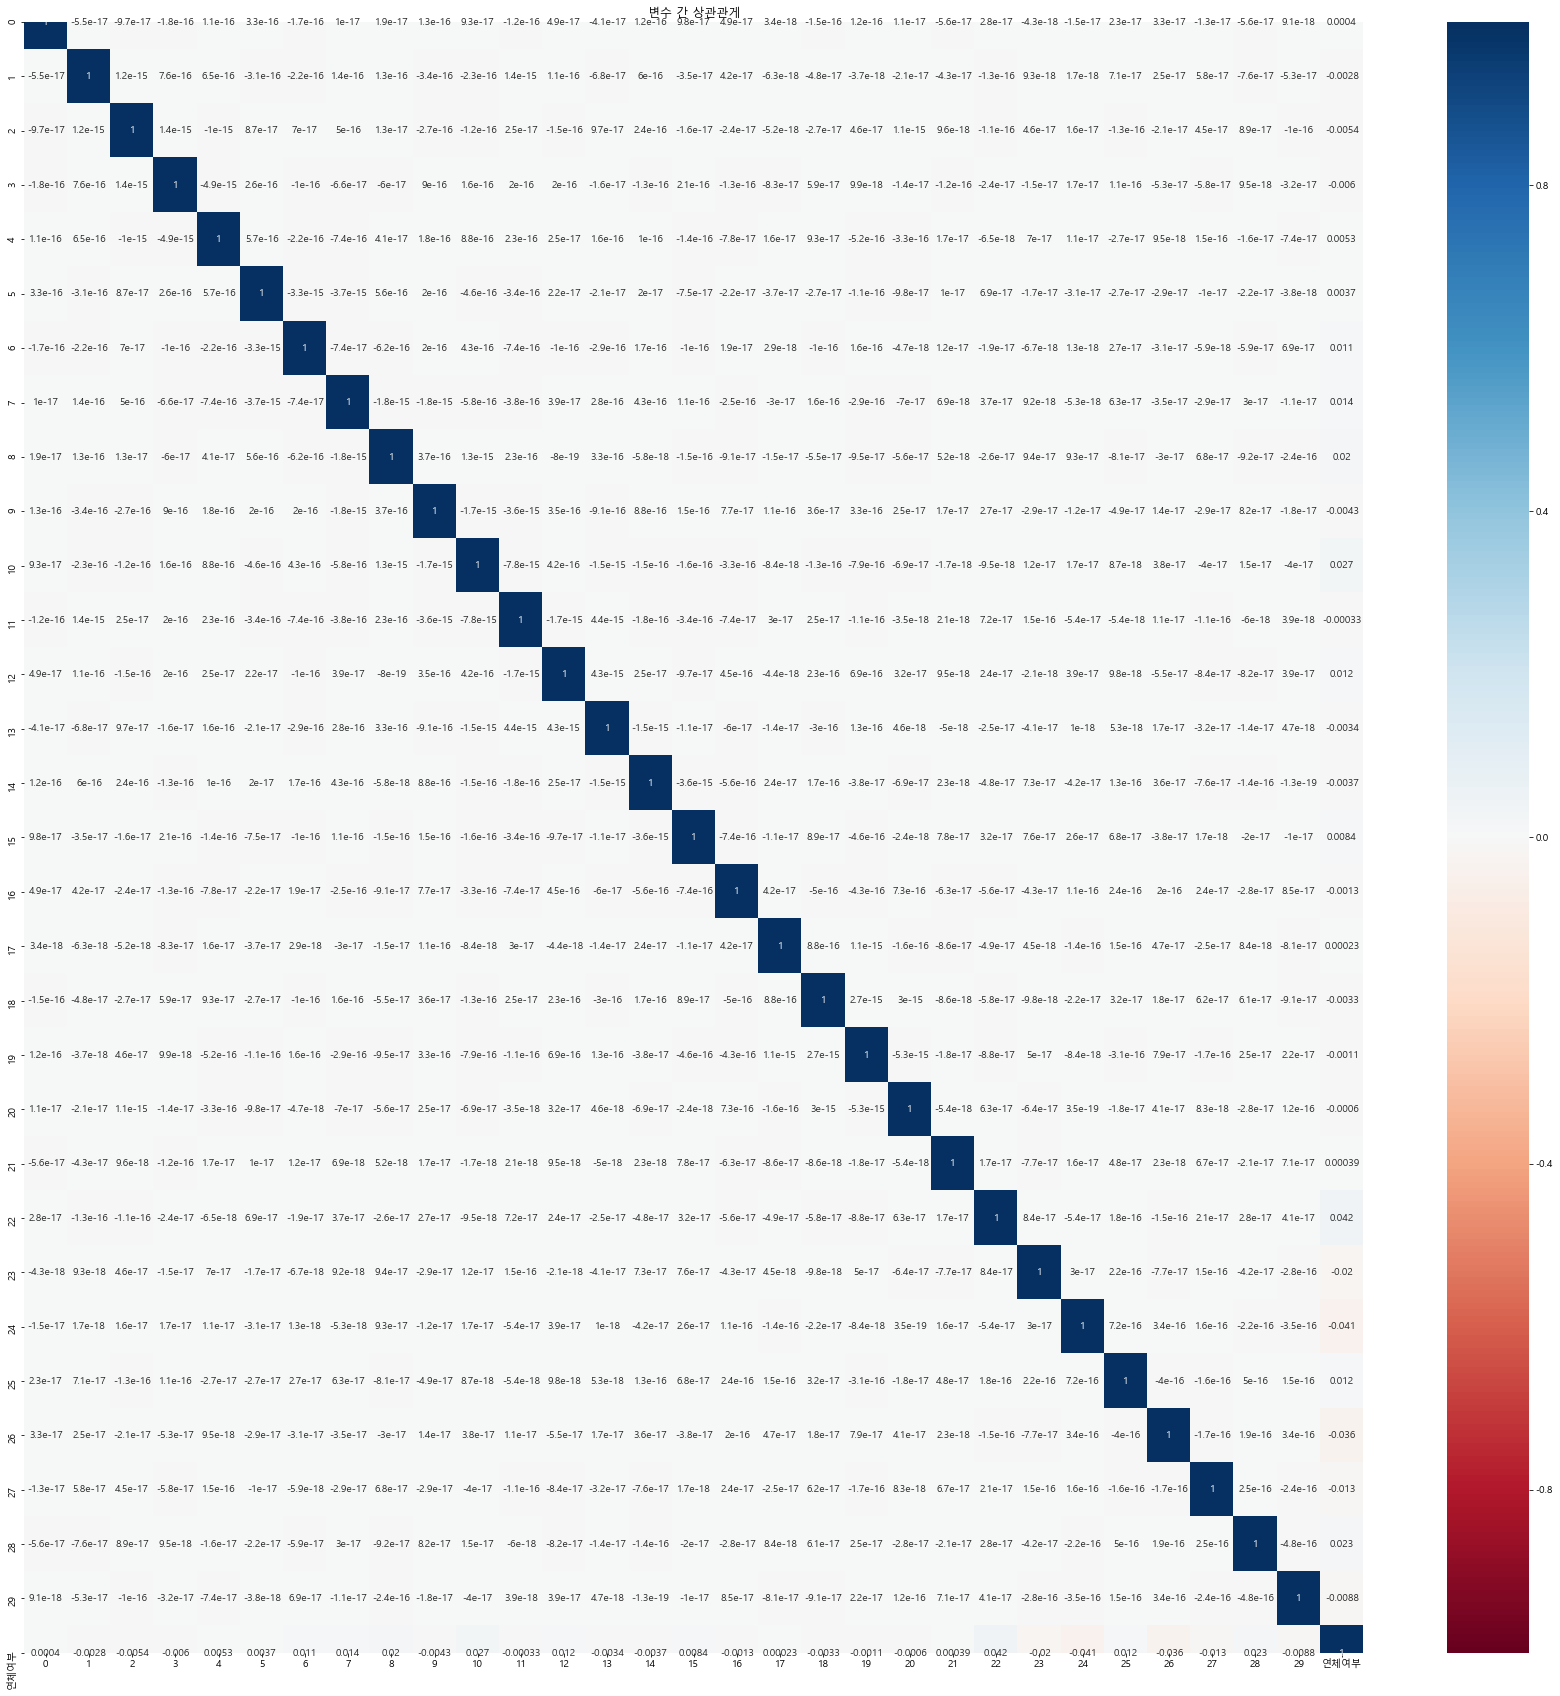

In [16]:
plt.figure(figsize = (30,30))
ax = sns.heatmap(df_m.corr(),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_O/png/PCA후 상관관계.png')

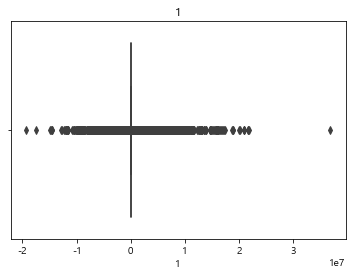

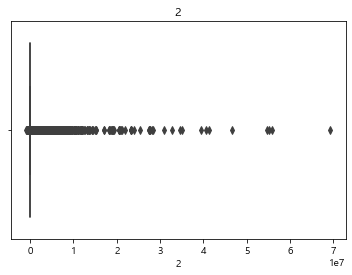

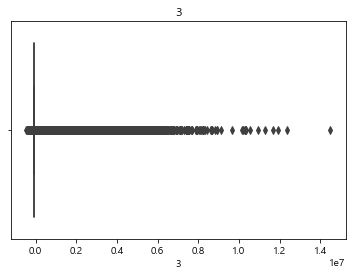

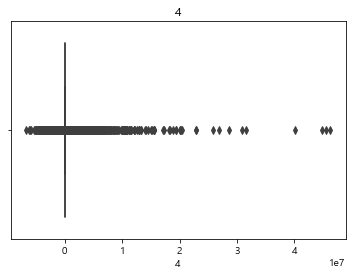

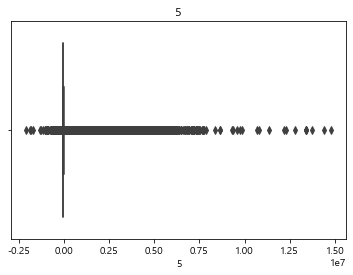

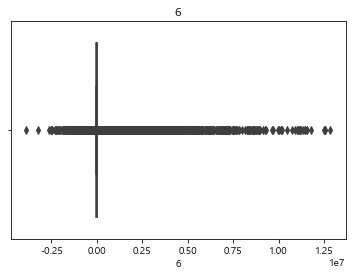

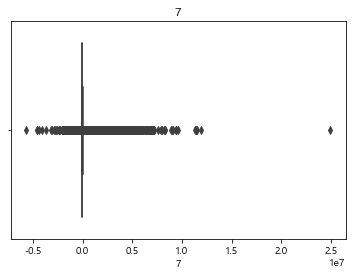

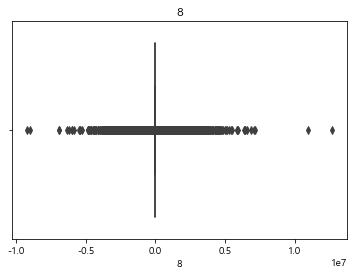

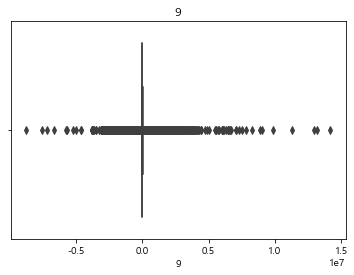

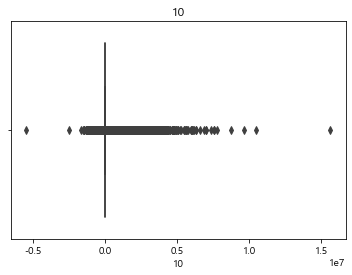

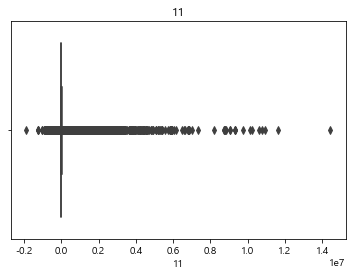

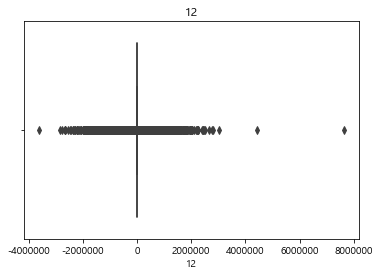

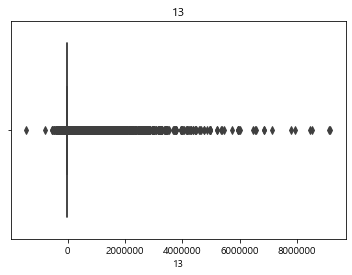

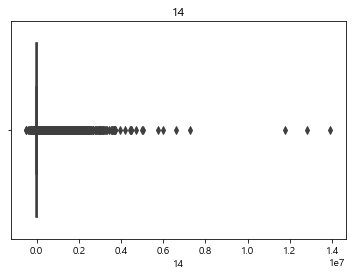

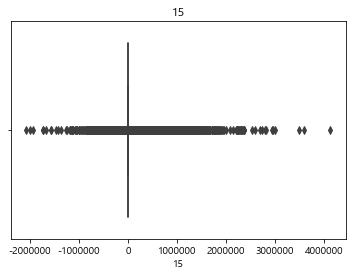

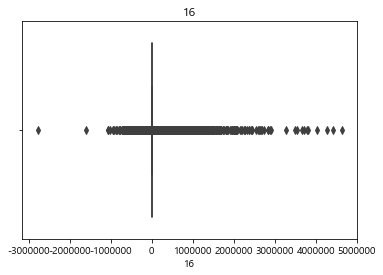

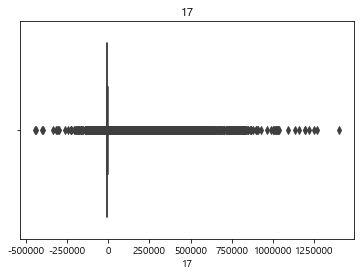

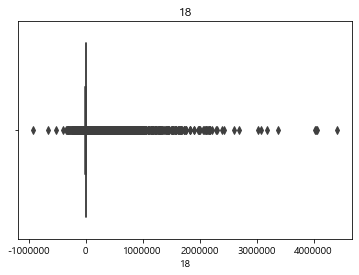

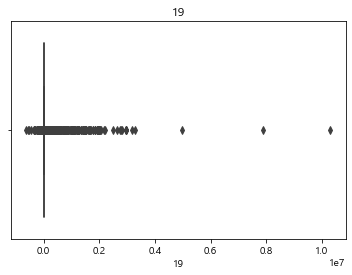

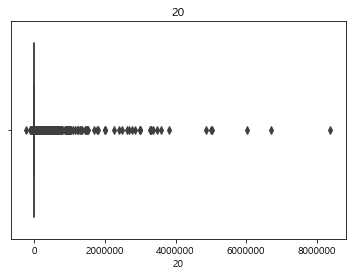

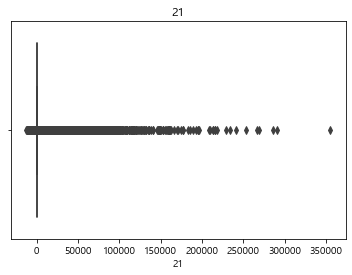

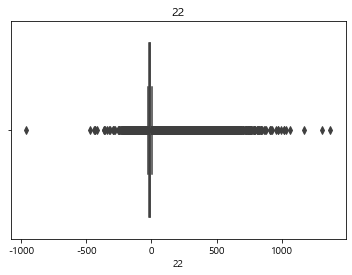

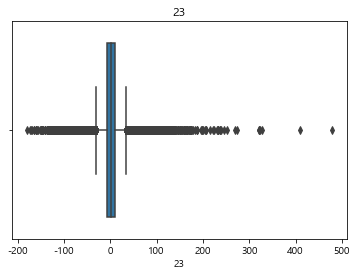

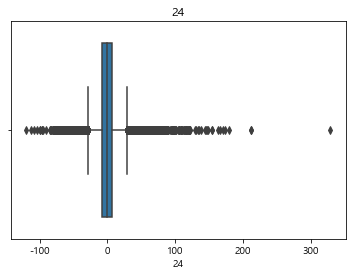

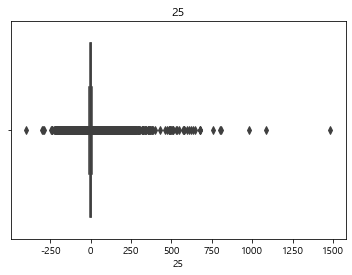

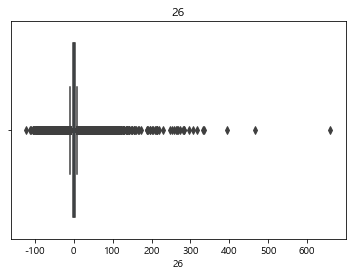

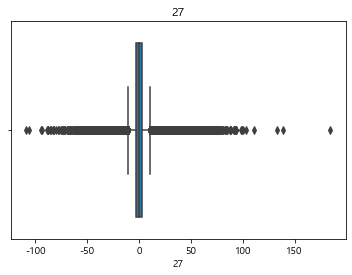

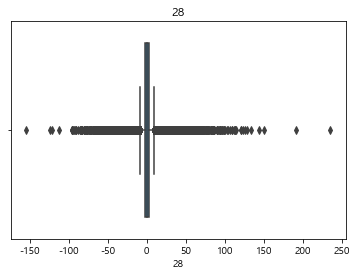

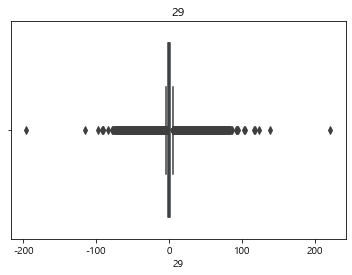

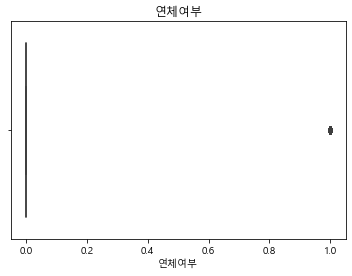

In [17]:
for i in range(1,len(df_m.columns)):
    try:
        sns.boxplot(x=df_m.columns[i], hue='연체여부', data=df_m)
        plt.title(df_m.columns[i])
        plt.show()
    
    except Exception as e:
        print('예외발생')

In [ ]:
for i in range(1,len(df_m.columns)):
    try:
        ax = sns.distplot(df_m[df_m.columns[i]])
        plt.title(df_m.columns[i])
        fig = ax.get_figure
        plt.show()
        ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_O/png/distplot/'+df_m.columns[i]+'.png')
    
    except Exception as e:
        print('예외발생')

In [ ]:
df_m.head()

# 1. Train - Test Split

해당 데이터에서 정상인 케이스 비율이 전체의 약 99.65%, 채무불이행(연체)가 약 0.35%임

In [19]:
df_m['연체여부'].value_counts() / df_m['연체여부'].value_counts().sum() *100

0    99.647121
1     0.352879
Name: 연체여부, dtype: float64

In [20]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

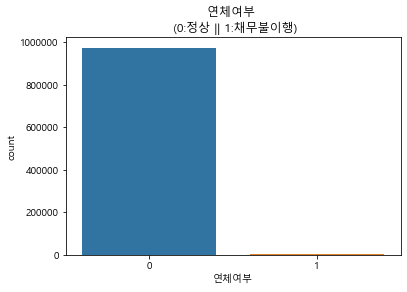

In [21]:
sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

In [22]:
#독립변수
X = df_m.drop(columns=['연체여부'])
y = df_m['연체여부']

* Random State seed 주는 것 보류

In [23]:
#stratify = y는 클래스 비율을 유지 즉 위의 0: 97.53 %  || 1: 2.47% 비율을 Train-Test에도 동일 적용

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=156)
print(X_train.shape, X_test.shape)

(684173, 30) (293217, 30)


In [24]:
y_train.value_counts() / y_train.value_counts().sum() *100

0    99.647165
1     0.352835
Name: 연체여부, dtype: float64

In [25]:
y_test.value_counts() / y_test.value_counts().sum() *100

0    99.647019
1     0.352981
Name: 연체여부, dtype: float64

In [26]:
#.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_test.csv')

In [27]:
#y_test.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_test.csv')

In [28]:



#X_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_train.csv')

In [29]:
#y_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_train.csv')

In [30]:
X_train.shape

(684173, 30)

In [31]:

X_test.shape

(293217, 30)

In [32]:
y_train.shape

(684173,)

In [33]:
y_test.shape

(293217,)

## 3. SMOTE OverSampling

Train Data Set에 대하여 Smote OverSampling 실행

원래 아이디어는 smote -> undersampling 해서 모델링 시간을 줄이려했지만...

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7) # RandomState 변경
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [35]:
print('SMOTE 적용 후 Data Set Size', X_train_over.shape, y_train_over.shape)

SMOTE 적용 후 Data Set Size (1363518, 30) (1363518,)


In [36]:
print('SMOTE 적용 후 Class 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 후 Class 분포:
 1    681759
0    681759
Name: 연체여부, dtype: int64


Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

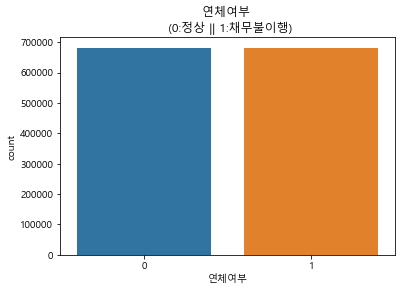

In [37]:
sns.countplot('연체여부', data = y_train_over.to_frame())
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

# Modelling

In [38]:
def auc_return(y_test, pred):
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test,pred)
    auc = metrics.auc(fpr,tpr)
    return auc

# 1. Regression

전통적으로 채무불이행 예측 모델은 다음과 같은 기본 알고리즘을 많이 사용함. 그 이유는 채무불이행 이유에 대한 '설명가능성'이 있기 때문 <br>
보수적인 금융권 특성, 고객과의 신뢰 등을 이유로 알고리즘의 설명 가능성에 대해 매우 민감함 <br>

## 1-1) Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train_over,y_train_over)

LogisticRegression()

In [39]:
lr_pred = lr.predict(X_test)

In [40]:
model_assessment(y_test, lr_pred)

accuracy 0.28329871733221473 

confusion_matrix [[ 82152 210030]
 [   119    916]] 

              precision    recall  f1-score   support

           0       1.00      0.28      0.44    292182
           1       0.00      0.89      0.01      1035

    accuracy                           0.28    293217
   macro avg       0.50      0.58      0.22    293217
weighted avg       1.00      0.28      0.44    293217



In [41]:
auc = auc_return(y_test,lr_pred) # 변경
print(auc)

0.5830956861412269


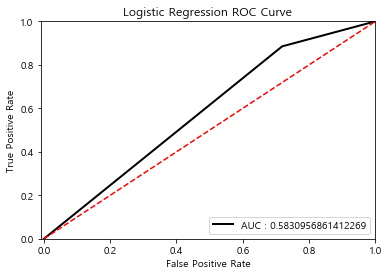

In [44]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, lr_pred)
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/Logistic Regression ROC.png')
plt.show()

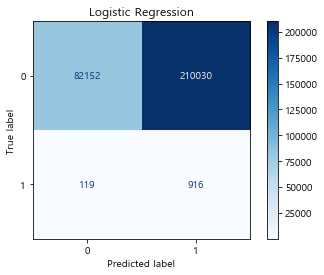

In [45]:
plot_confusion_matrix(lr,X_test,y_test,cmap='Blues')

plt.title('Logistic Regression')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/Logistic Regression Confusion Matrix.png')
plt.show()

In [46]:
#모델저장
import pickle as pkl
with open("lr_model.pkl",'wb') as outfile:
    pkl.dump(lr,outfile)

In [47]:
#모델저장
import pickle as pkl
with open("lr_predict.pkl",'wb') as outfile:
    pkl.dump(lr_pred,outfile)

# 2. Classification

### 2-1) XGBOOST

In [48]:
#X_test.head()

In [39]:
import pickle as pkl
with open('xgb_predict.pkl','rb') as infile:
    xgb_over_pred = pkl.load(infile)

In [40]:
import pickle as pkl
with open('xgb_model.pkl','rb') as infile:
    xgb_over_model = pkl.load(infile)

In [41]:
xgb_over_pred = xgb_over_model.predict(X_test)

In [42]:
auc = auc_return(y_test,xgb_over_pred)
auc = auc.round(2)

In [58]:
auc

0.77

In [43]:
model_assessment(y_test, xgb_over_pred)

accuracy 0.7646828117060062 

confusion_matrix [[223420  68762]
 [   237    798]] 

              precision    recall  f1-score   support

           0       1.00      0.76      0.87    292182
           1       0.01      0.77      0.02      1035

    accuracy                           0.76    293217
   macro avg       0.51      0.77      0.44    293217
weighted avg       1.00      0.76      0.86    293217



In [59]:
model_assessment(y_test, xgb_over_pred)

accuracy 0.7646828117060062 

confusion_matrix [[223420  68762]
 [   237    798]] 

              precision    recall  f1-score   support

           0       1.00      0.76      0.87    292182
           1       0.01      0.77      0.02      1035

    accuracy                           0.76    293217
   macro avg       0.51      0.77      0.44    293217
weighted avg       1.00      0.76      0.86    293217



In [44]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [29]:
######기본모델
xgb_over_model = XGBClassifier(n_estimators=100,
                              objective='binary:logistic',
                              seed=156,
                              learning_rate=0.01)
xgb_over_model.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.68971	validation_1-logloss:0.68888
[1]	validation_0-logloss:0.68449	validation_1-logloss:0.68513
[2]	validation_0-logloss:0.68148	validation_1-logloss:0.68128
[3]	validation_0-logloss:0.67679	validation_1-logloss:0.67747
[4]	validation_0-logloss:0.67405	validation_1-logloss:0.67384
[5]	validation_0-logloss:0.67020	validation_1-logloss:0.67017
[6]	validation_0-logloss:0.66615	validation_1-logloss:0.66668
[7]	validation_0-logloss:0.66294	validation_1-logloss:0.66311
[8]	validation_0-logloss:0.65957	validation_1-logloss:0.65976
[9]	validation_0-logloss:0.65578	validation_1-logloss:0.65633
[10]	validation_0-logloss:0.65299	validation_1-logloss:0.65314
[11]	validation_0-logloss:0.64937	validation_1-logloss:0.64967
[12]	validation_0-logloss:0.64659	validation_1-logloss:0.64642
[13]	validation_0-logloss:0.64268	validation_1-logloss:0.64353
[14]	validation_0-logloss:0.63993	validation_1-logloss:0.64058
[15]	validation_0-logloss:0.63686	validation_1-logloss:0.63735
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=156,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
import pickle as pkl
with open('xgb_model.pkl','rb') as infile:
    xgb_over_model = pkl.load(infile)

In [48]:
print(xgb_over_model.predict_proba(X_test).mean())

0.5


In [ ]:
model_assessment(y_test, xgb_over_pred)

In [42]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.7646828117060062 

confusion_matrix [[223420  68762]
 [   237    798]] 

              precision    recall  f1-score   support

           0       1.00      0.76      0.87    292182
           1       0.01      0.77      0.02      1035

    accuracy                           0.76    293217
   macro avg       0.51      0.77      0.44    293217
weighted avg       1.00      0.76      0.86    293217



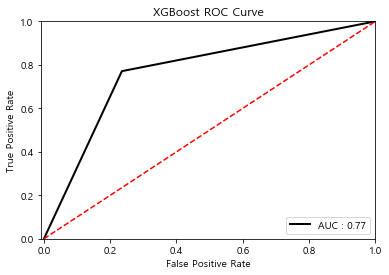

In [65]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost ROC.png')
plt.show()

In [37]:
xgb_over_pred = xgb_over_model.predict(X_test)

NameError: name 'xgb_over_model' is not defined

In [32]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.7646828117060062 

confusion_matrix [[223420  68762]
 [   237    798]] 

              precision    recall  f1-score   support

           0       1.00      0.76      0.87    292182
           1       0.01      0.77      0.02      1035

    accuracy                           0.76    293217
   macro avg       0.51      0.77      0.44    293217
weighted avg       1.00      0.76      0.86    293217



In [33]:
auc = auc_return(y_test,xgb_over_pred) # 변경
print(auc)

0.767837437832822


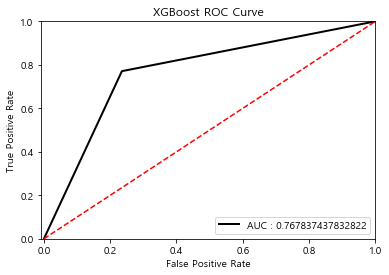

In [34]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost ROC.png')
plt.show()

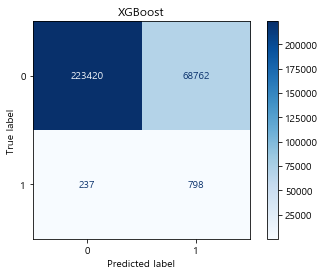

In [36]:
plot_confusion_matrix(xgb_over_model,X_test,y_test,cmap='Blues')

plt.title('XGBoost')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost.png')
plt.show()

In [37]:
#모델저장
import pickle as pkl
with open("xgb_model.pkl",'wb') as outfile:
    pkl.dump(xgb_over_model,outfile)

In [38]:
#모델저장
import pickle as pkl
with open("xgb_predict.pkl",'wb') as outfile:
    pkl.dump(xgb_over_pred,outfile)

In [39]:
xgb_over_model.feature_importances_

array([0.01412689, 0.01479052, 0.00749605, 0.0072275 , 0.02976778,
       0.00811967, 0.02315673, 0.00551835, 0.06329501, 0.00650746,
       0.14124483, 0.00568911, 0.04268198, 0.09312242, 0.01531543,
       0.00705788, 0.01644059, 0.00925176, 0.02421782, 0.02513488,
       0.02494256, 0.00678565, 0.23223244, 0.02543684, 0.05425616,
       0.01488606, 0.04255945, 0.0161901 , 0.01559749, 0.00695054],
      dtype=float32)

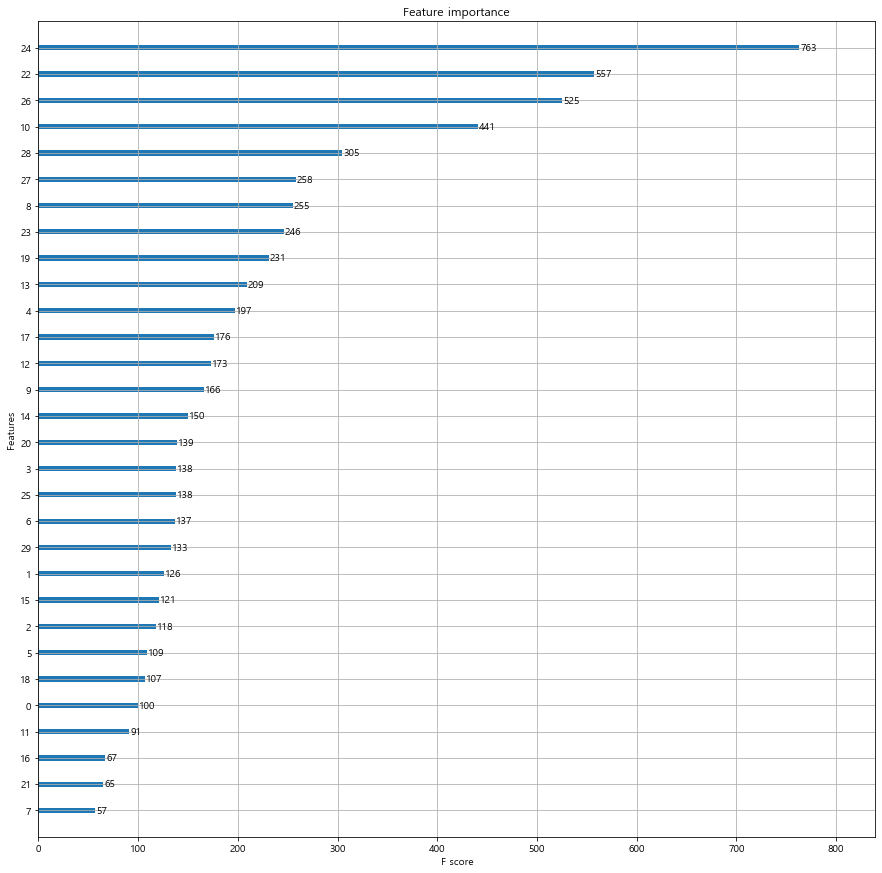

In [42]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_over_model.get_booster(), ax=ax)
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/XGBoost_FeatureImportance.png')

## 2) LightGBM

In [27]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=1000)

In [28]:
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[1]	training's binary_logloss: 0.655792	valid_1's binary_logloss: 0.656257
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.625005	valid_1's binary_logloss: 0.626398
[3]	training's binary_logloss: 0.598965	valid_1's binary_logloss: 0.60167
[4]	training's binary_logloss: 0.577073	valid_1's binary_logloss: 0.581203
[5]	training's binary_logloss: 0.558205	valid_1's binary_logloss: 0.563957
[6]	training's binary_logloss: 0.541468	valid_1's binary_logloss: 0.548811
[7]	training's binary_logloss: 0.527211	valid_1's binary_logloss: 0.536002
[8]	training's binary_logloss: 0.514562	valid_1's binary_logloss: 0.524881
[9]	training's binary_logloss: 0.503565	valid_1's binary_logloss: 0.515278
[10]	training's binary_logloss: 0.493873	valid_1's binary_logloss: 0.507067
[11]	training's binary_logloss: 0.485149	valid_1's binary_logloss: 0.499724
[12]	training's binary_logloss: 0.476974	valid_1's binary_logloss: 0.492715
[13]	training's binary_logloss: 0.469

LGBMClassifier(n_estimators=1000)

In [67]:
import pickle as pkl
with open('lgbm_model.pkl','rb') as infile:
    lgbm = pkl.load(infile)

In [68]:
lgbm_pred = lgbm.predict(X_test)

In [69]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.8018771080803637 

confusion_matrix [[234396  57786]
 [   307    728]] 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    292182
           1       0.01      0.70      0.02      1035

    accuracy                           0.80    293217
   macro avg       0.51      0.75      0.46    293217
weighted avg       1.00      0.80      0.89    293217



In [32]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.9111988731894808 

confusion_matrix [[266849  25333]
 [   705    330]] 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    292182
           1       0.01      0.32      0.02      1035

    accuracy                           0.91    293217
   macro avg       0.51      0.62      0.49    293217
weighted avg       0.99      0.91      0.95    293217



In [71]:
auc = auc_return(y_test, lgbm_pred)

In [72]:
auc = auc.round(2)

In [33]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100)

In [34]:
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[1]	training's binary_logloss: 0.655792	valid_1's binary_logloss: 0.656257
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.625005	valid_1's binary_logloss: 0.626398
[3]	training's binary_logloss: 0.598965	valid_1's binary_logloss: 0.60167
[4]	training's binary_logloss: 0.577073	valid_1's binary_logloss: 0.581203
[5]	training's binary_logloss: 0.558205	valid_1's binary_logloss: 0.563957
[6]	training's binary_logloss: 0.541468	valid_1's binary_logloss: 0.548811
[7]	training's binary_logloss: 0.527211	valid_1's binary_logloss: 0.536002
[8]	training's binary_logloss: 0.514562	valid_1's binary_logloss: 0.524881
[9]	training's binary_logloss: 0.503565	valid_1's binary_logloss: 0.515278
[10]	training's binary_logloss: 0.493873	valid_1's binary_logloss: 0.507067
[11]	training's binary_logloss: 0.485149	valid_1's binary_logloss: 0.499724
[12]	training's binary_logloss: 0.476974	valid_1's binary_logloss: 0.492715
[13]	training's binary_logloss: 0.469

LGBMClassifier()

In [35]:
lgbm_pred = lgbm.predict(X_test)

In [36]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.8018771080803637 

confusion_matrix [[234396  57786]
 [   307    728]] 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    292182
           1       0.01      0.70      0.02      1035

    accuracy                           0.80    293217
   macro avg       0.51      0.75      0.46    293217
weighted avg       1.00      0.80      0.89    293217



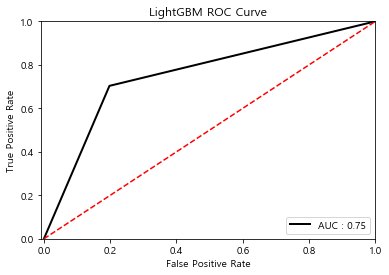

In [73]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, 
                                                lgbm_pred) ##############
plt.title('LightGBM ROC Curve') ################
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/LGBM ROC.png') ##############
plt.show()

In [13]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100)

In [44]:
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[1]	training's binary_logloss: 0.655792	valid_1's binary_logloss: 0.656257
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.625005	valid_1's binary_logloss: 0.626398
[3]	training's binary_logloss: 0.598965	valid_1's binary_logloss: 0.60167
[4]	training's binary_logloss: 0.577073	valid_1's binary_logloss: 0.581203
[5]	training's binary_logloss: 0.558205	valid_1's binary_logloss: 0.563957
[6]	training's binary_logloss: 0.541468	valid_1's binary_logloss: 0.548811
[7]	training's binary_logloss: 0.527211	valid_1's binary_logloss: 0.536002
[8]	training's binary_logloss: 0.514562	valid_1's binary_logloss: 0.524881
[9]	training's binary_logloss: 0.503565	valid_1's binary_logloss: 0.515278
[10]	training's binary_logloss: 0.493873	valid_1's binary_logloss: 0.507067
[11]	training's binary_logloss: 0.485149	valid_1's binary_logloss: 0.499724
[12]	training's binary_logloss: 0.476974	valid_1's binary_logloss: 0.492715
[13]	training's binary_logloss: 0.469

LGBMClassifier()

In [45]:
lgbm_pred = lgbm.predict(X_test)

In [46]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.8018771080803637 

confusion_matrix [[234396  57786]
 [   307    728]] 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    292182
           1       0.01      0.70      0.02      1035

    accuracy                           0.80    293217
   macro avg       0.51      0.75      0.46    293217
weighted avg       1.00      0.80      0.89    293217



In [76]:
auc = auc_return(y_test,lgbm_pred) # 변경
print(auc)

0.7528038261639384


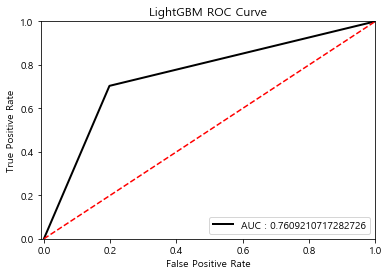

In [85]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, 
                                                lgbm_pred) ##############
plt.title('LightGBM ROC Curve') ################
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/LGBM ROC.png') ##############
plt.show()

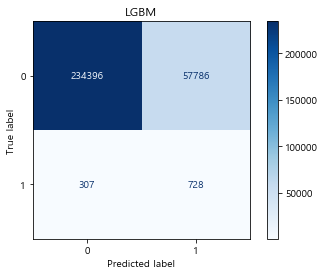

In [86]:
plot_confusion_matrix(lgbm #######
                      ,X_test,y_test,cmap='Blues')

plt.title('LGBM') ##############
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/LGBM.png') ##############
plt.show()

In [54]:
#모델저장
import pickle as pkl
with open("lgbm_model.pkl",'wb') as outfile:
    pkl.dump(lgbm,outfile)

In [55]:
#모델저장
import pickle as pkl
with open("lgbm_model.predict",'wb') as outfile:
    pkl.dump(lgbm_pred,outfile)

## 3) RandomForest

In [20]:
rfc = RandomForestClassifier(n_estimators=100, random_state=146)
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=146)

In [21]:
rfc_prd = rfc.predict(X_test)

In [22]:
print('<OverSampling 후 RandomForest 기본 모델 성능>')

model_assessment(y_test,rfc_prd)

<OverSampling 후 RandomForest 기본 모델 성능>
accuracy 0.9851406978449407 

confusion_matrix [[288818   3364]
 [   993     42]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292182
           1       0.01      0.04      0.02      1035

    accuracy                           0.99    293217
   macro avg       0.50      0.51      0.51    293217
weighted avg       0.99      0.99      0.99    293217



In [23]:
#모델저장
import pickle as pkl
with open("rf.pkl",'wb') as outfile:
    pkl.dump(rfc,outfile)

In [24]:
#모델저장
import pickle as pkl
with open("rf.predict",'wb') as outfile:
    pkl.dump(rfc_prd,outfile)

In [25]:
auc = auc_return(y_test,rfc_prd) # 변경
print(auc)

0.5145331691712104


## 4) Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_over, y_train_over)

In [27]:
dt_pred = dt.predict(X_test)

In [28]:
print('<OverSampling 후 Decision Tree 기본 모델 성능>')

model_assessment(y_test,dt_pred)

<OverSampling 후 Decision Tree 기본 모델 성능>
accuracy 0.9663423334936242 

confusion_matrix [[283241   8941]
 [   928    107]] 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    292182
           1       0.01      0.10      0.02      1035

    accuracy                           0.97    293217
   macro avg       0.50      0.54      0.50    293217
weighted avg       0.99      0.97      0.98    293217



In [29]:
#모델저장
import pickle as pkl
with open("dt.pkl",'wb') as outfile: ################
    pkl.dump(dt,outfile) ################

In [30]:
#모델저장
import pickle as pkl
with open("dt_predict.pkl",'wb') as outfile: ################
    pkl.dump(dt_pred,outfile) ################

In [31]:
auc = auc_return(y_test,dt_pred) # 변경
print(auc)

0.5363904262967325


## 5) Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21,max_depth = 5)
gbc.fit(X_train_over, y_train_over)
gbc_pred = gbc.predict(X_test)

In [64]:
gbc_pred = gbc.predict(X_test)

In [65]:
print('Gradient Boosting 기본 모델 성능')

model_assessment(y_test,gbc_pred)

Gradient Boosting 기본 모델 성능
accuracy 0.8007857661731755 

confusion_matrix [[234058  58124]
 [   289    746]] 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    292182
           1       0.01      0.72      0.02      1035

    accuracy                           0.80    293217
   macro avg       0.51      0.76      0.46    293217
weighted avg       1.00      0.80      0.89    293217



In [67]:
#모델저장
import pickle as pkl
with open("gbc_model.pkl",'wb') as outfile:
    pkl.dump(gbc,outfile)

In [70]:
#모델저장
import pickle as pkl
with open("gbc_predict.pkl",'wb') as outfile:
    pkl.dump(gbc_pred,outfile)

In [77]:
import pickle as pkl
with open('gbc_model.pkl','rb') as infile:
    gbc= pkl.load(infile)

In [78]:
gbc_pred = gbc.predict(X_test)

In [79]:
auc = auc_return(y_test,gbc_pred) # 변경
print(auc)

0.7609210717282726


In [80]:
auc=auc.round(2)

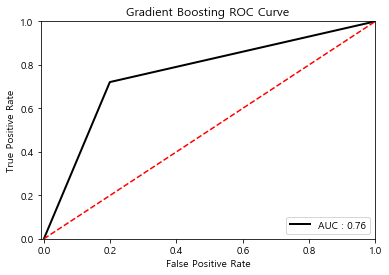

In [81]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, gbc_pred)
plt.title('Gradient Boosting ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/GBC ROC.png')
plt.show()

In [ ]:
from math

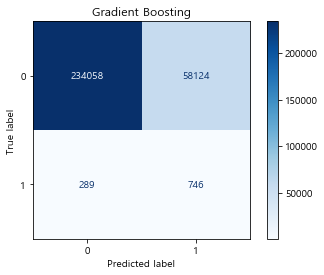

In [84]:
plot_confusion_matrix(gbc,X_test,y_test,cmap='Blues')

plt.title('Gradient Boosting')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/png/GBC.png')
plt.show()

## 5) CatBoost